<a href="https://colab.research.google.com/github/ashish1401/Machine-Learning/blob/main/SVM_aided_Loan_Status_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv('/content/dataset.csv')
# df = df.drop(columns=['Gender'])
df_rural = df[df['Property_Area']=='Rural']
df_urban = df[df['Property_Area']=='Urban']
df_semiurban = df[df['Property_Area']=='Semiurban']
df_urban.isna().sum()

In [ ]:
df_rural.isna().sum()

**About Dataset Features:**

Loan_ID

Gender

Married

Dependents

Education

Self_Employed

ApplicantIncome

CoapplicantIncome

LoanAmount

Loan_Amount_Term

Credit_History

Propert_Area

Loan_Status


In [ ]:
df.info()

In [ ]:
df.isnull().sum()

In [ ]:

df[['Married','Self_Employed']] = df[['Married','Self_Employed']].fillna('No')

In [ ]:
df[['Dependents','Credit_History']] = df[['Dependents','Credit_History']].fillna(0)

<Axes: xlabel='Loan_Amount_Term'>

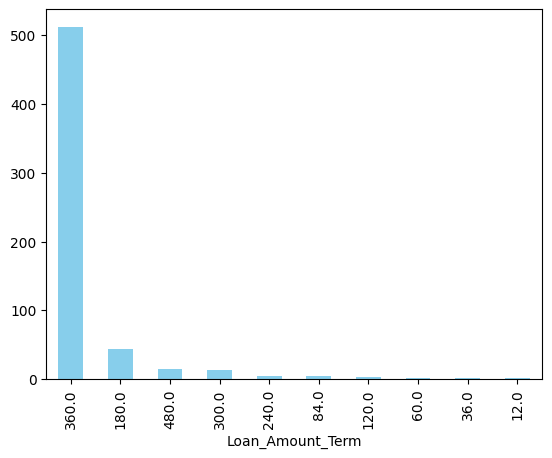

In [ ]:
#replace Loan_Amount_Term with the median period
df['Loan_Amount_Term'].value_counts().plot(kind="bar",color='skyblue')

Dropping all NA values lead to loss of 100 datapoints ie atleast 16% of our dataset , hence we must impute some values

In [ ]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(360)
df.isna().sum()

In [ ]:
df.info()

Performing Label Encoding for 'Loan_Status' and 'Dependents\' - as we will eventually fit our training model with numeric data

In [ ]:
df = df.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)
df = df.replace({"Married":{'No':0,'Yes':1},"Self_Employed":{'No':0,'Yes':1}},inplace=True)
df = df.replace(to_replace='3+',value=4)

Perform Data Type Conversions once again using Label Encoding

In [ ]:
#CHANGE DATA-TYPE

In [ ]:
#separating the data and label
X = df.drop(columns=['Loan_ID','Loan_Status'],axis=1)
# axis=1 ensures that data is deleted by the column not the row
Y = df[['Loan_Status']]

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=21)

In [ ]:
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train,Y_train)

In [ ]:
Y_pred = classifier.predict(X_test[0])
Y_pred